### 한글폰트 깨짐 방지

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False

In [51]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.1.1
설치 위치:  C:\Users\Rstudio\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\Rstudio\.matplotlib
캐시 위치:  C:\Users\Rstudio\.matplotlib


In [52]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\Users\Rstudio\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

# 시작

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [4]:
directory = 'C:/Users/Rstudio/Desktop/Bigcon2020/20S_Bigcon/Visualization'

In [5]:
X_df=pd.read_excel(directory+'/농수축소분류.xlsx') 

In [10]:
Z = X_df.copy() ; Z

,상품명,식품군,판매단가,취급액,노출(분),판매개수,분당판매개수,분당취급액
0,뽕셰프 이봉원 특갈비탕 12팩,육류,60900,14113000,20.0,231.740558,11.587028,705650.0
1,뽕셰프 이봉원 특갈비탕 12팩,육류,60900,32395000,20.0,531.937603,26.596880,1619750.0
2,뽕셰프 이봉원 특갈비탕 12팩,육류,60900,39669000,20.0,651.379310,32.568966,1983450.0
3,국내산 손질갑오징어 8팩,어류,49900,60787000,20.0,1218.176353,60.908818,3039350.0
4,국내산 손질갑오징어 8팩,어류,49900,115457000,20.0,2313.767535,115.688377,5772850.0
...,...,...,...,...,...,...,...,...
3879,안동간고등어 20팩,어류,30900,54879000,20.0,1776.019417,88.800971,2743950.0
3880,안동간고등어 20팩,어류,30900,63460000,20.0,2053.721683,102.686084,3173000.0
3881,제주갈치+참조기세트,어류,49900,34001000,20.0,681.382766,34.069138,1700050.0
3882,제주갈치+참조기세트,어류,49900,54234000,20.0,1086.853707,54.342685,2711700.0


#### 소분류별 빈도

In [11]:
lst = list(Z["식품군"])
lst.count('육류')

802

In [12]:
lst = list(Z["식품군"])
x = [lst.count('곡류'),lst.count('과일'),lst.count('기타'),lst.count('김치'),lst.count('당류'),lst.count('어류'),lst.count('건어류'), lst.count('육류'),lst.count('음료'),lst.count('장류/조미료'),lst.count('주전부리'),lst.count('채소')]
label = ['곡류','과일','기타','김치','당류','어류','건어류','육류','음료','장류/조미료','주전부리','채소']
index = np.arange(len(label))
x

[264, 51, 12, 284, 12, 1835, 119, 802, 137, 99, 242, 27]

([<matplotlib.axis.XTick at 0x2965eaf7c48>,
 <a list of 12 Text xticklabel objects>)

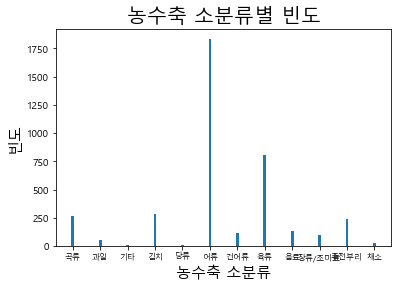

In [13]:
plt.bar(index, x,width=0.1)
plt.title('농수축 소분류별 빈도', fontsize=20)
plt.xlabel('농수축 소분류', fontsize=15)
plt.ylabel('빈도', fontsize=15)
plt.xticks(index, label, fontsize=8)

어류가 엄청 많고 그 다음에 육류, 곡류가 많다

#### 분당 판매개수

In [14]:
x = Z.groupby('식품군').분당판매개수.mean()
label = ['곡류','과일','기타','김치','당류','어류','건어류','육류','음료','장류/조미료','주전부리','채소']
index = np.arange(len(label))
x

식품군
건어류       60.030674
곡류        39.747084
과일        34.782181
기타        23.616738
김치        49.056237
당류        20.991514
어류        56.145917
육류        40.716903
음료        81.873178
장류/조미료    30.987249
주전부리      40.792543
채소        68.450124
Name: 분당판매개수, dtype: float64

([<matplotlib.axis.XTick at 0x2965e6092c8>,
 <a list of 12 Text xticklabel objects>)

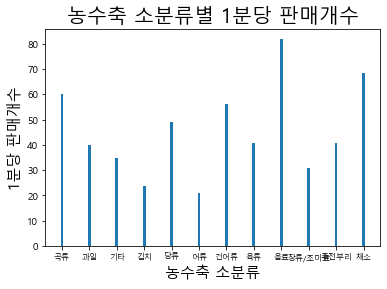

In [15]:
# 1분당 판매개수
plt.bar(index, x,width=0.1)
plt.title('농수축 소분류별 1분당 판매개수', fontsize=20)
plt.xlabel('농수축 소분류', fontsize=15)
plt.ylabel('1분당 판매개수', fontsize=15)
plt.xticks(index, label, fontsize=8)

의외로 음료가 1분당 가장 많이 팔린다. 혹시 다른 거에 비해 단가가 싸서 사람들이 비교적 구매 결정을 쉽게 내리는 것 아닐까...?

#### 판매액 평균

In [16]:
x = Z.groupby('식품군').판매단가.mean()
label = ['곡류','과일','기타','김치','당류','어류','건어류','육류','음료','장류/조미료','주전부리','채소']
index = np.arange(len(label))
x

식품군
건어류       33076.470588
곡류        60254.545455
과일        41586.274510
기타        45150.000000
김치        39164.084507
당류        59900.000000
어류        44388.828338
육류        53913.715711
음료        32389.051095
장류/조미료    74957.575758
주전부리      35352.892562
채소        31122.222222
Name: 판매단가, dtype: float64

([<matplotlib.axis.XTick at 0x2965e4adb48>,
 <a list of 12 Text xticklabel objects>)

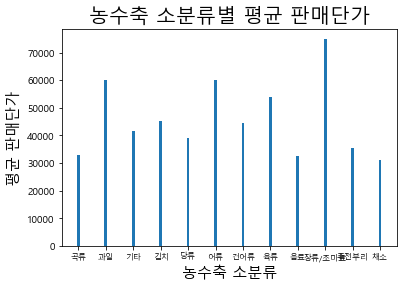

In [17]:
plt.bar(index, x,width=0.1)
plt.title('농수축 소분류별 평균 판매단가', fontsize=20)
plt.xlabel('농수축 소분류', fontsize=15)
plt.ylabel('평균 판매단가', fontsize=15)
plt.xticks(index, label, fontsize=8)

장류는 메주, 고춧가루, 다시팩이 있다. 메주가 비싸다

#### 분당 취급액 평균

In [18]:
x = Z.groupby('식품군').분당취급액.mean()
label = ['곡류','과일','기타','김치','당류','어류','건어류','육류','음료','장류/조미료','주전부리','채소']
index = np.arange(len(label))
x

식품군
건어류       1.979554e+06
곡류        2.394885e+06
과일        1.422161e+06
기타        9.077917e+05
김치        1.916790e+06
당류        1.257392e+06
어류        2.354465e+06
육류        2.168048e+06
음료        2.560665e+06
장류/조미료    2.043542e+06
주전부리      1.394583e+06
채소        2.128119e+06
Name: 분당취급액, dtype: float64

([<matplotlib.axis.XTick at 0x2965e393e88>,
 <a list of 12 Text xticklabel objects>)

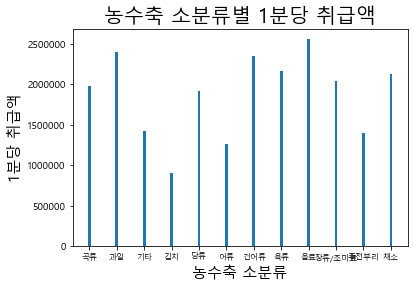

In [19]:
# 1분당 총 취급액
plt.bar(index, x,width=0.1)
plt.title('농수축 소분류별 1분당 취급액', fontsize=20)
plt.xlabel('농수축 소분류', fontsize=15)
plt.ylabel('1분당 취급액', fontsize=15)
plt.xticks(index, label, fontsize=8)

#### 분당 취급액 합

In [20]:
x = Z.groupby('식품군').분당취급액.sum()
label = ['곡류','과일','기타','김치','당류','어류','건어류','육류','음료','장류/조미료','주전부리','채소']
index = np.arange(len(label))
x

식품군
건어류       2.355669e+08
곡류        6.322498e+08
과일        7.253023e+07
기타        1.089350e+07
김치        5.443682e+08
당류        1.508870e+07
어류        4.320443e+09
육류        1.738774e+09
음료        3.508111e+08
장류/조미료    2.023107e+08
주전부리      3.374891e+08
채소        5.745920e+07
Name: 분당취급액, dtype: float64

([<matplotlib.axis.XTick at 0x2965e424c48>,
 <a list of 12 Text xticklabel objects>)

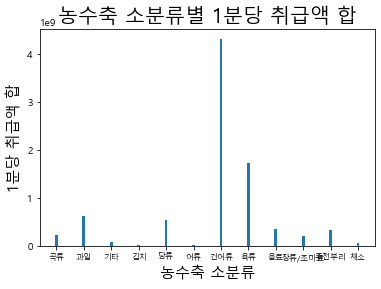

In [21]:
# 1분당 총 취급액
plt.bar(index, x,width=0.1)
plt.title('농수축 소분류별 1분당 취급액 합', fontsize=20)
plt.xlabel('농수축 소분류', fontsize=15)
plt.ylabel('1분당 취급액 합', fontsize=15)
plt.xticks(index, label, fontsize=8)

쥐포가 진짜 잘나간다